In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2

In [11]:
haarca = cv2.CascadeClassifier('./Model/haarcascade_frontalface_default.xml') # cascade classifier
model_svm =  pickle.load(open('./Model/model_svm.pickle','rb')) # machine learning model (SVM)
pca = pickle.load(open('./Model/pca_50.pickle','rb')) # pca dictionary

model_pca = pca['pca']
mean_face = pca['mean_face']

In [30]:
img = cv2.imread('test_image.jpg') 
img_gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

faces = haarca.detectMultiScale(img_gray,1.3,3)
predictions = []

for x,y,w,h in faces:
    roi = img_gray[y:y+h,x:x+w]
    roi = roi / 255.0
    
    if roi.shape[1] > 100:
        roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA) #Shrink
    else:
        roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC) #Enlarge
        
    roi_reshape = roi_resize.reshape(1,10000)

    roi_mean = roi_reshape - mean_face 
    
    eigen_image = model_pca.transform(roi_mean)
    eig_img = model_pca.inverse_transform(eigen_image)
    results = model_svm.predict(eigen_image)
    
    prob_score = model_svm.predict_proba(eigen_image)
    prob_score_max = prob_score.max()
    
    if results[0] == 1 :
        pred = 'Male'
        color = (255,255,0)
    else:
        pred = 'Female'
        color = (255,0,255)
        
    text = "%s : %d"%(pred,prob_score_max*100)
        
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.rectangle(img,(x,y-40),(x+w,y),color,-1)
    cv2.putText(img,text,(x,y),cv2.FONT_HERSHEY_PLAIN,2,(255,255,255),5)
    output = {
        'roi':roi,
        'eig_img': eig_img,
        'prediction_name':pred,
        'score':prob_score_max
    }
    
    predictions.append(output)

In [31]:
len(predictions)

8

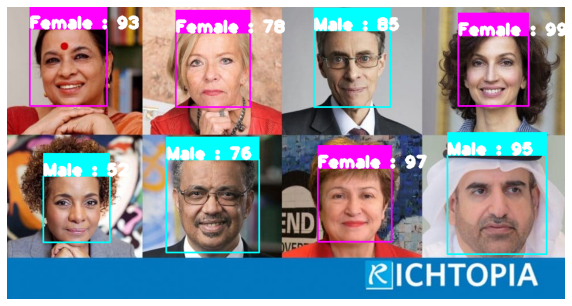

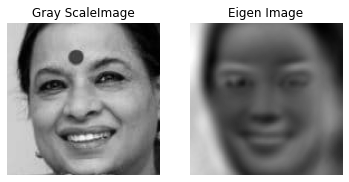

Predicted Gender = Female
Predicted score = 93.94 %
----------------------------------------------------------------------------------------------------


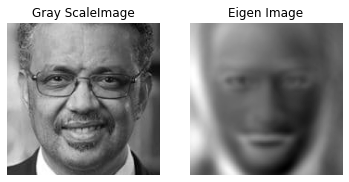

Predicted Gender = Male
Predicted score = 76.21 %
----------------------------------------------------------------------------------------------------


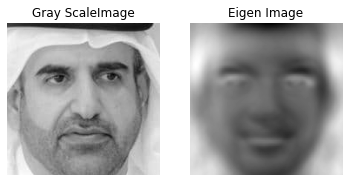

Predicted Gender = Male
Predicted score = 95.62 %
----------------------------------------------------------------------------------------------------


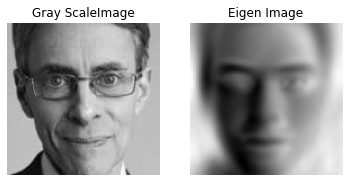

Predicted Gender = Male
Predicted score = 85.57 %
----------------------------------------------------------------------------------------------------


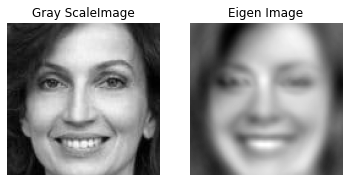

Predicted Gender = Female
Predicted score = 99.96 %
----------------------------------------------------------------------------------------------------


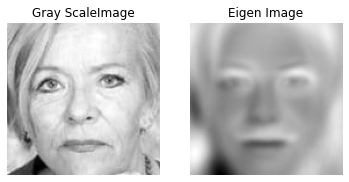

Predicted Gender = Female
Predicted score = 78.99 %
----------------------------------------------------------------------------------------------------


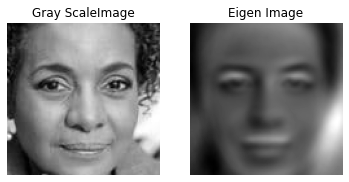

Predicted Gender = Male
Predicted score = 52.51 %
----------------------------------------------------------------------------------------------------


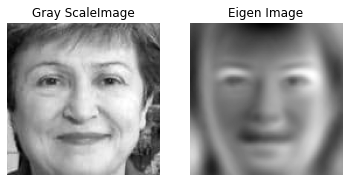

Predicted Gender = Female
Predicted score = 97.64 %
----------------------------------------------------------------------------------------------------


In [13]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## generate report
for i in range(len(predictions)):
    obj_gray = predictions[i]['roi'] #gray scale
    obj_eig = predictions[i]['eig_img'].reshape(100,100) #eigen image
    plt.subplot(1,2,1)
    plt.imshow(obj_gray,cmap='gray')
    plt.title('Gray ScaleImage')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(obj_eig,cmap='gray')
    plt.title('Eigen Image')
    plt.axis('off')
    
    plt.show()
    print('Predicted Gender =',predictions[i]['prediction_name'])
    print('Predicted score = {:,.2f} %'.format(predictions[i]['score']*100))
    
    print('-'*100)